# Bayesian Nonparametric Models

by Emil Vassev

March 7, 2024
<br><br>
Copyright (C) 2024 - All rights reserved, do not copy or distribute without permission of the author.
***

## Bayesian Nonparametric Models

* Bayesian models on an infinite-dimensional parameter space. 

    * Parameter space - typically chosen as the set of all possible solutions for a given learning problem. 
        * In a regression problem - the parameter space can be the set of continuous functions.
        * in a density estimation problem - the parameter space can consist of all densities. 
        

* Use only a finite subset of the available parameter dimensions to explain a finite sample of observations.
    * Classical adaptive problems, such as nonparametric estimation and model selection, can be formulated as Bayesian inference problems. 
   
   
* Popular examples of Bayesian nonparametric models:
    * **Gaussian Process Regression Model** - the correlation structure is refined with growing sample size.
    * **Dirichlet Process Mixture Models for Clustering** - adapt the number of clusters to the complexity of the data.


* Applicaions - applied to a variety of machine learning problems: regression, classification, clustering, latent variable modeling, sequential modeling, image segmentation, source separation and grammar induction.

## Gaussian Process Regression Model

**Regression** - a common machine learning task that can be described as:
* Given some observed data points (training dataset), finding a function that represents the dataset as close as possible, then using the function to make predictions at new data points.

**Gaussian (Normal) Distribution**

<div>
    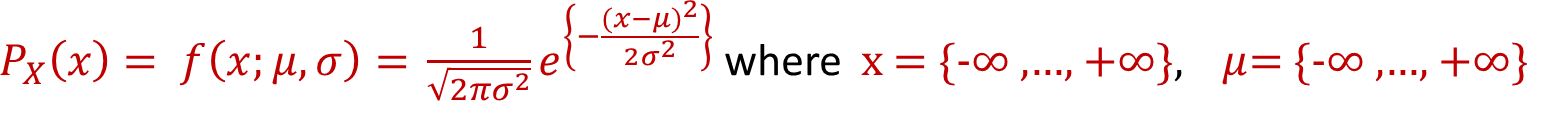
</div>

* **𝑋** is random variable, **𝜇** is the mean (or expectation) of the distribution, and **𝜎** is the standard deviation of the distribution


**Multivariate Normal (MVN) Distribution**
* system is described by more random variables $𝑋=\{𝑋_1,𝑋_2,…,𝑋_𝐷\}$ that are correlated

<div>
    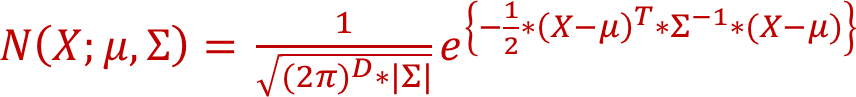
</div>


* $𝐷$ is the dimension
* $𝜇=𝔼[𝑋] ∈ ℝ^𝐷$  is the mean vector ($ℝ^𝐷$ is the real coordinate space of dimension $𝐷$)
* $Σ=𝑐𝑜𝑣[𝑋]$ is a $𝐷×𝐷$ covariance matrix
* $𝑋=\{𝑋_1,𝑋_2,…,𝑋_𝐷\}^𝑇$ is multivariate random variable (random vector), or its transpose vector

**Radial Basis Function** - Gaussian kernel function
<div>
    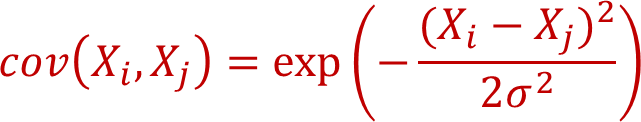
</div>

* $|𝑋_𝑖−𝑋_𝑗|$  - Euclidean Distance between $𝑋_𝑖$ and $𝑋_𝑗$
* $𝜎$ – the variance 


## Implementing Gaussian Process Regression Model in Python

We use the **sklearn.gaussian_process** library. 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process

Gaussian Processes in **sklearn** are built on two main concepts: the mean function, which represents the average prediction, and the covariance function, also known as the kernel, which defines how points in the dataset relate to each other. 

### Kernels for Gaussian Processes

* Kernels (also called “covariance functions” in the context of GPs) are a crucial ingredient of GPs which determine the shape of prior and posterior of the GP. 

* Kernels encode the assumptions on the function being learned by defining the “similarity” of two datapoints combined with the assumption that similar datapoints should have similar target values.

* Kernels capture the relationships and underlying structure of the data. In a feature space, a kernel quantifies how similar two pairs of random variables are to one another. 

* Common Kernel Functions for GP:
    * **Linear Kernel** - captures linear relationships.
    * **Radial Basis Function (RBF)** - assesses similarity based on Euclidean distances.


* With kernels, Gaussian processes can handle non-linearities, model complex relationships, and generate predictions by extrapolating and interpolating data from observed points. 

* A proper kernel selection is essential for meaningful and effective Gaussian process regression as it reflects previous assumptions about the underlying data structure.

<div>
 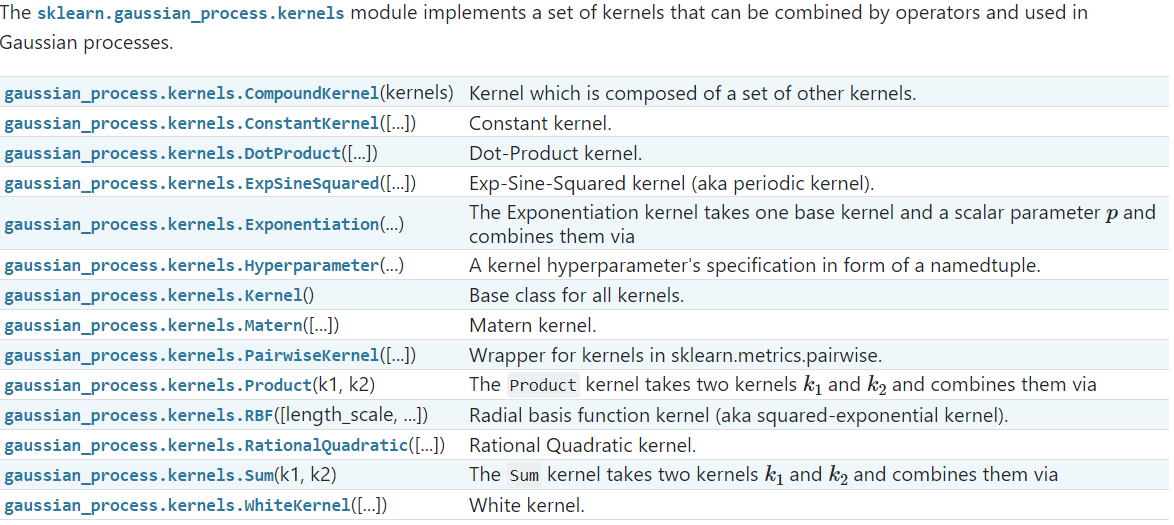
</div

### Combining Kernels

Combining kernels in Gaussian processes - a way to improve the model’s expressiveness and adaptability. 

* The features and form of functions within a Gaussian process are determined by kernels. 
* We can develop a composite kernel that can recognize different patterns and structures in the data by merging multiple kernels. 
* The combination can be made by multiplying or adding distinct kernels, each of which adds to the total function in a different way. 
    * As a result, the Gaussian process can adjust to a variety of patterns and offer a more thorough depiction of the relationships found in the data.


* Kernels can be combined to create a new kernel that captures multiple aspects of the data. 
    * For instance, adding two kernels k1 and k2 results in a kernel that is the sum of the individual kernels.

### The GaussianProcessRegressor Class

**GaussianProcessRegressor** is provided by the **sklearn.gaussian_process** library. 

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html


In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

kernel = ConstantKernel(constant_value=1) + \
         ConstantKernel(constant_value=1, constant_value_bounds =(1e3,1e9)) * \
         RBF(length_scale=10) + \
         WhiteKernel(5)
gpr_model = GaussianProcessRegressor(kernel=kernel)

### Prepare the Dataset

We use the **sklearn.datasets.fetch_california_housing** to load the California housing dataset for regression.

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

housing.data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [4]:
housing.target.head(10)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

In [5]:
X, y = fetch_california_housing(return_X_y=True)

# Use only a subset of the data to reduce memory usage
subset_size = 2000  
X_subset = X[:subset_size]
y_subset = y[:subset_size]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2)

### Training the GPR Model

In [7]:
gpr_model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 + 1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=5))

### Testing the GPR Model

In [9]:
# Make predictions
y_pred, y_pred_std = gpr_model.predict(X_test, return_std=True)

### Evaluating the GPR Model

In [10]:
from sklearn.metrics import mean_squared_error
 
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3204343522592745


In [11]:
from sklearn.metrics import r2_score

pred_score = r2_score(y_test,y_pred)

print(pred_score)

0.6166797765848433


### Plotting the Results

Text(0, 0.5, 'Predicted')

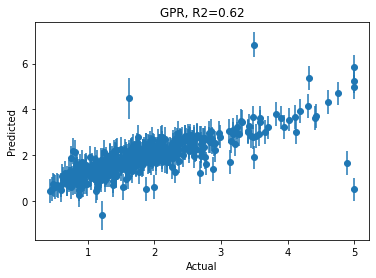

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.errorbar(y_test, y_pred, yerr=y_pred_std, fmt='o')
plt.title('GPR, R2=%.2f' % pred_score)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Different Kernel Combination

In [14]:
kernel = ConstantKernel(constant_value=1) + RBF(length_scale=10) + WhiteKernel(5)
gpr_model = GaussianProcessRegressor(kernel=kernel)

In [15]:
gpr_model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 + RBF(length_scale=10) + WhiteKernel(noise_level=5))

In [16]:
# Make predictions
y_pred, y_pred_std = gpr_model.predict(X_test, return_std=True)

In [17]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6939313407924133


In [18]:
pred_score = r2_score(y_test,y_pred)

print(pred_score)

0.16988327028027583


Text(0, 0.5, 'Predicted')

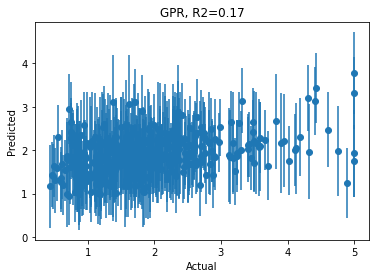

In [19]:
plt.figure()
plt.errorbar(y_test, y_pred, yerr=y_pred_std, fmt='o')
plt.title('GPR, R2=%.2f' % pred_score)
plt.xlabel('Actual')
plt.ylabel('Predicted')